In [149]:
cd ../TileEM/

/srv/data/home/jlee782/crowd-seg/analysis/TileEM


In [150]:
%pylab inline
%load_ext autoreload
%autoreload 2
from paper_visualizations import * 
from PixelEM import * 
from test_sample import test_sample_obj
import json

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
GTLSA_Fixed = pd.read_csv("pixel_em/GTLSA_ground_truth_full_PRJ_table.csv")
isoGTLSA_Fixed = pd.read_csv("pixel_em/isoGTLSA_ground_truth_full_PRJ_table.csv")

In [162]:
algo_df = pd.read_csv("pixel_em/ground_truth_rerun_full_PRJ_table_invariant_GTLSA_fixed.csv",index_col=0)
aw_df = pd.read_csv("pixel_em/ground_truth_rerun_full_PRJ_table_AW.csv",index_col=0)
algo_df = pd.concat([algo_df,aw_df])
mv_df = pd.read_csv("pixel_em/MV_PRJ_table.csv")
mv_df = mv_df.rename(columns={'MV_precision':"P [MV]",
                              "MV_recall":"R [MV]",
                               "MV_jaccard":"J [MV]"})
# # mv_df["thresh"]=0
# # mv_df["algorithm"]="MV"

# df = pd.concat([algo_df,mv_df])
algo_lst=["basic","GT","isoGT","GTLSA","isoGTLSA","AW","isoAW"]
newdf = mv_df 
for algo in algo_lst:
    data = algo_df[algo_df["algorithm"]==algo].rename(columns={"precision":"P [{}]".format(algo),
                                            "recall":"R [{}]".format(algo),
                                            "jaccard":"J [{}]".format(algo)})
    data = data.drop('algorithm',axis=1)
    newdf = newdf.merge(data)

newdf = newdf.drop_duplicates()



GTLSA_Fixed = GTLSA_Fixed.rename(columns={"EM_precision":"P [GTLSA PixTile]",
                            "EM_recall":"R [GTLSA PixTile]",
                            "EM_jaccard":"J [GTLSA PixTile]"})
isoGTLSA_Fixed = isoGTLSA_Fixed.rename(columns={"EM_precision":"P [isoGTLSA PixTile]",
                            "EM_recall":"R [isoGTLSA PixTile]",
                            "EM_jaccard":"J [isoGTLSA PixTile]"})

newdf = newdf.merge(GTLSA_Fixed).merge(isoGTLSA_Fixed)

In [163]:
newdf.to_csv("cleaned_ground_truth_all.csv")
df = newdf

In [164]:
#The std among basic and AW is lower than the other models
#df.groupby(["num_workers","sample_num","objid"]).std()

In [168]:
algo_lst=["MV","basic","GT","isoGT","GTLSA","isoGTLSA","AW","isoAW","GTLSA PixTile","isoGTLSA PixTile"]
metric_keys = []
for algo in algo_lst:
    metric_keys.append('P [{}]'.format(algo))
    metric_keys.append('R [{}]'.format(algo))
    metric_keys.append('J [{}]'.format(algo))

In [169]:
all_data = []
for algo in algo_lst:
    data = np.array(df[df["thresh"]==0]['J [{}]'.format(algo)])
    all_data.append(data)

In [175]:
df[df["thresh"]==0].filter(regex='J').mean()

J [MV]                  0.895840
J [basic]               0.902282
J [GT]                  0.905123
J [isoGT]               0.915441
J [GTLSA]               0.861095
J [isoGTLSA]            0.897899
J [AW]                  0.900340
J [isoAW]               0.866167
J [GTLSA PixTile]       0.799379
J [isoGTLSA PixTile]    0.884122
dtype: float64

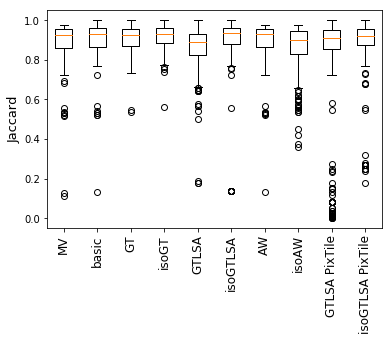

In [176]:
a = plt.boxplot(all_data)
plt.xticks(range(1,len(algo_lst)+1), algo_lst,fontsize=12, rotation='vertical')
plt.ylabel("Jaccard",fontsize=13)

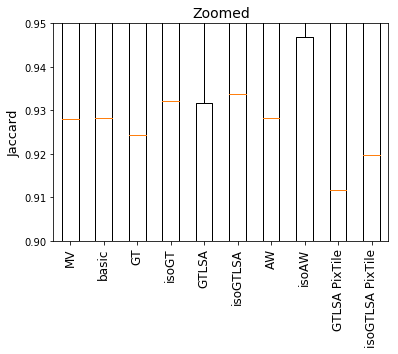

In [177]:
a = plt.boxplot(all_data)
plt.xticks(range(1,len(algo_lst)+1), algo_lst,fontsize=12, rotation='vertical')
plt.ylabel("Jaccard",fontsize=13)
plt.ylim(0.90,0.95)
plt.title("Zoomed",fontsize=14)

In [178]:
def grouped_boxplot(df,metric):
    metric2abbrev={"Jaccard":"J",
                   "Precision":"P",
                   "Recall":"R"}
    all_data = []
    for algo in algo_lst:
        data = np.array(df[df["thresh"]==0]['{} [{}]'.format(metric2abbrev[metric],algo)])
        all_data.append(data)
    plt.figure()
    a = plt.boxplot(all_data)
    plt.xticks(range(1,len(algo_lst)+1), algo_lst,fontsize=12, rotation='vertical')
    plt.ylabel(metric,fontsize=13)
    
    plt.figure()
    a = plt.boxplot(all_data)
    plt.xticks(range(1,len(algo_lst)+1), algo_lst,fontsize=12, rotation='vertical')
    plt.ylabel(metric,fontsize=13)
    plt.ylim(0.80,1)
    plt.title("Zoomed",fontsize=14)
    

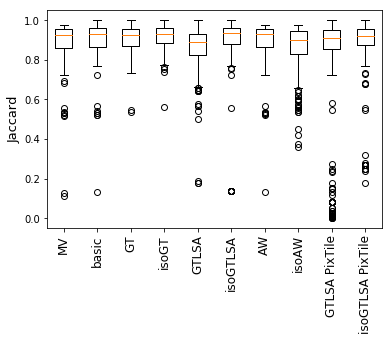

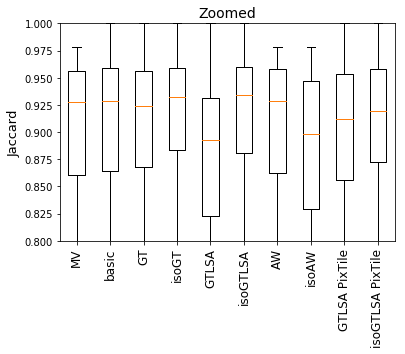

In [179]:
grouped_boxplot(df,"Jaccard")

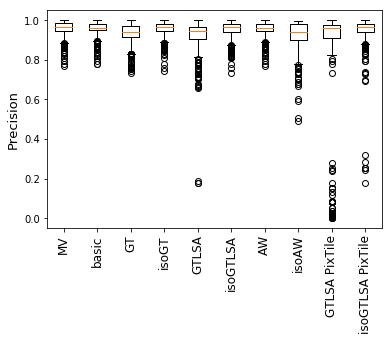

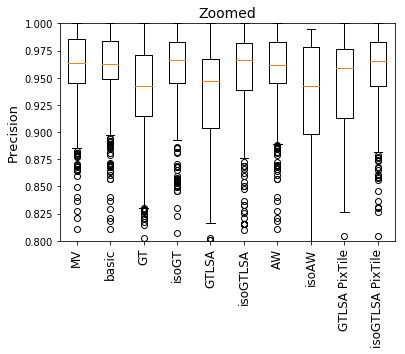

In [180]:
grouped_boxplot(df,"Precision")

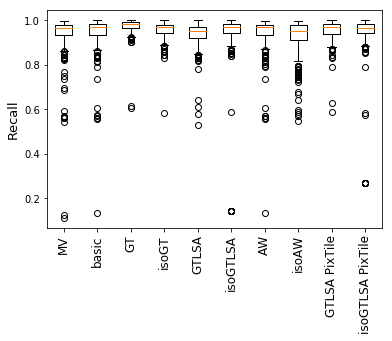

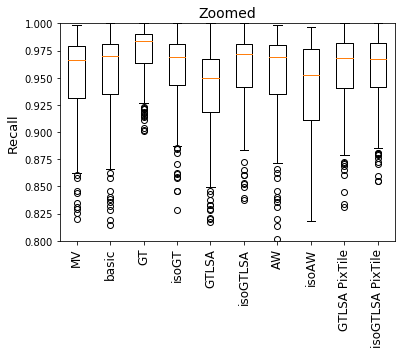

In [181]:
grouped_boxplot(df,"Recall")

In [182]:
df[df["thresh"]==0].mean()[metric_keys]

P [MV]                  0.953827
R [MV]                  0.936690
J [MV]                  0.895840
P [basic]               0.953479
R [basic]               0.943563
J [basic]               0.902282
P [GT]                  0.928588
R [GT]                  0.972500
J [GT]                  0.905123
P [isoGT]               0.954313
R [isoGT]               0.957361
J [isoGT]               0.915441
P [GTLSA]               0.915059
R [GTLSA]               0.935489
J [GTLSA]               0.861095
P [isoGTLSA]            0.950411
R [isoGTLSA]            0.939492
J [isoGTLSA]            0.897899
P [AW]                  0.952503
R [AW]                  0.942551
J [AW]                  0.900340
P [isoAW]               0.921963
R [isoAW]               0.927789
J [isoAW]               0.866167
P [GTLSA PixTile]       0.831289
R [GTLSA PixTile]       0.955231
J [GTLSA PixTile]       0.799379
P [isoGTLSA PixTile]    0.937484
R [isoGTLSA PixTile]    0.941017
J [isoGTLSA PixTile]    0.884122
dtype: flo

In [183]:
df[df["thresh"]==0].filter(regex="J").mean()

J [MV]                  0.895840
J [basic]               0.902282
J [GT]                  0.905123
J [isoGT]               0.915441
J [GTLSA]               0.861095
J [isoGTLSA]            0.897899
J [AW]                  0.900340
J [isoAW]               0.866167
J [GTLSA PixTile]       0.799379
J [isoGTLSA PixTile]    0.884122
dtype: float64

In [184]:
df[df["thresh"]==0].filter(regex="J").std()

J [MV]                  0.096061
J [basic]               0.084530
J [GT]                  0.063807
J [isoGT]               0.053982
J [GTLSA]               0.107235
J [isoGTLSA]            0.130863
J [AW]                  0.084162
J [isoAW]               0.112848
J [GTLSA PixTile]       0.298188
J [isoGTLSA PixTile]    0.148623
dtype: float64

#### Ranking Jaccard 

In [187]:
rank_df = df[df["thresh"]==0].filter(regex="J").rank(axis=1,ascending=False,method="average")
rank_df.mean()

J [MV]                  6.232836
J [basic]               5.247761
J [GT]                  5.968657
J [isoGT]               4.350746
J [GTLSA]               8.779104
J [isoGTLSA]            4.194030
J [AW]                  5.623881
J [isoAW]               6.056716
J [GTLSA PixTile]       5.117910
J [isoGTLSA PixTile]    3.428358
dtype: float64

In [189]:
df[df["thresh"]==0].filter(regex="J").mean()

J [MV]                  0.895840
J [basic]               0.902282
J [GT]                  0.905123
J [isoGT]               0.915441
J [GTLSA]               0.861095
J [isoGTLSA]            0.897899
J [AW]                  0.900340
J [isoAW]               0.866167
J [GTLSA PixTile]       0.799379
J [isoGTLSA PixTile]    0.884122
dtype: float64

In [196]:
df[df["thresh"]==0].filter(regex="J").std()

J [MV]                  0.096061
J [basic]               0.084530
J [GT]                  0.063807
J [isoGT]               0.053982
J [GTLSA]               0.107235
J [isoGTLSA]            0.130863
J [AW]                  0.084162
J [isoAW]               0.112848
J [GTLSA PixTile]       0.298188
J [isoGTLSA PixTile]    0.148623
dtype: float64

In [190]:
#Check that lower numbers correspond to lower values 
# rank_df.head()
# df[df["thresh"]==0].filter(regex="J").head()

Lower ranks means higher J. isoGT and isGTLSA does better in rank. 

#### Visualizations 

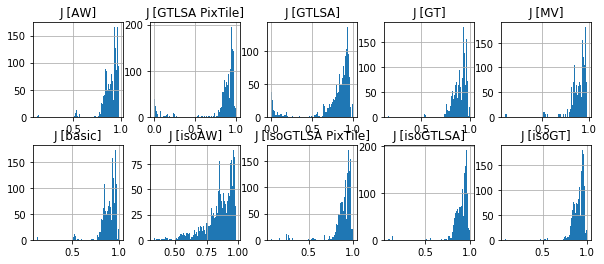

In [194]:
fig = plt.figure()
a = df.filter(regex="J").hist(bins=80,layout=(2,5),figsize=(10,4))

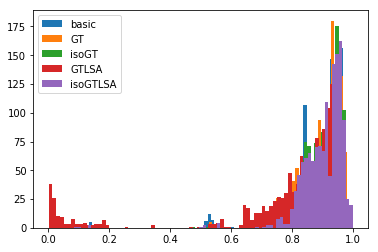

In [139]:
a = plt.hist(df["J [basic]"],label="basic",bins=80)
a = plt.hist(df["J [GT]"],label="GT",bins=80)
a = plt.hist(df["J [isoGT]"],label="isoGT",bins=80)
a = plt.hist(df["J [GTLSA]"],label="GTLSA",bins=80)
a = plt.hist(df["J [isoGTLSA]"],label="isoGTLSA",bins=80)
plt.legend()


#### If we only look at "good objects", ones with jaccard >0.6 then what would the average look like (i.e. filter out things that has gone terribly wrong, and how many are there)

In [140]:
Jkeys = df.keys()[df.keys().str.contains('J')]
(df[Jkeys]>0.9).sum()

J [MV]          690
J [basic]       710
J [GT]          690
J [isoGT]       786
J [GTLSA]       482
J [isoGTLSA]    801
J [AW]          693
J [isoAW]       523
dtype: int64

#### Count how many GTLSA > basic 

In [144]:
df[['J [basic]','J [AW]']].rank(axis=1,ascending=False,method="average").sum()

J [basic]    1771.5
J [AW]       2221.5
dtype: float64

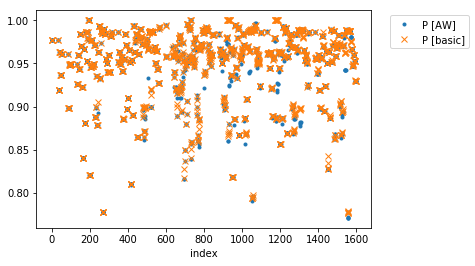

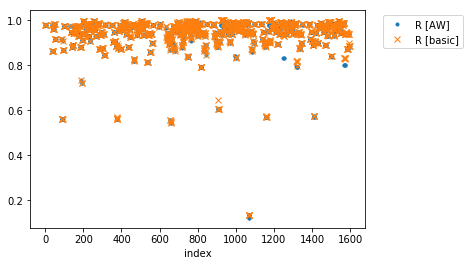

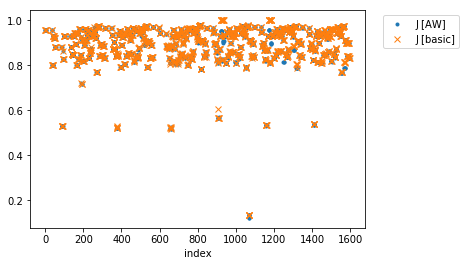

In [145]:
compare_PRJ_fixed_sample_object(df,'AW','basic')

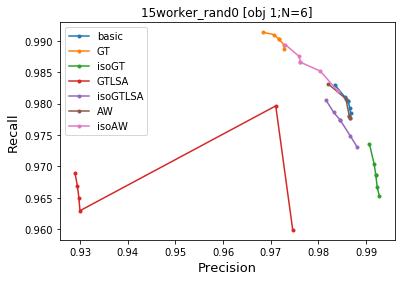

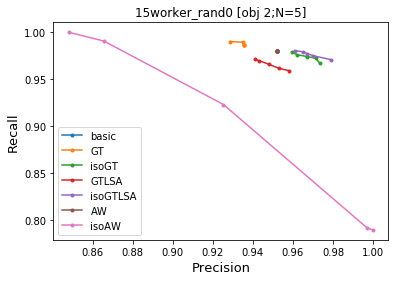

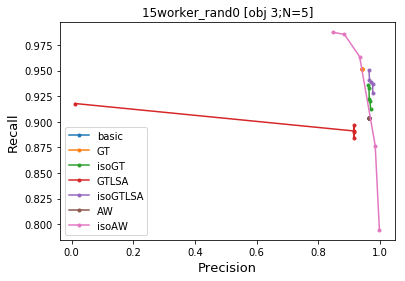

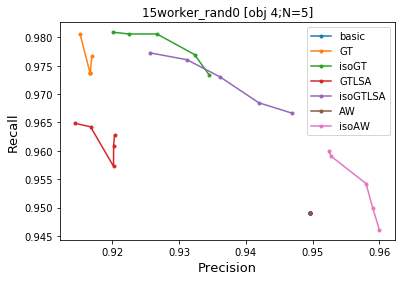

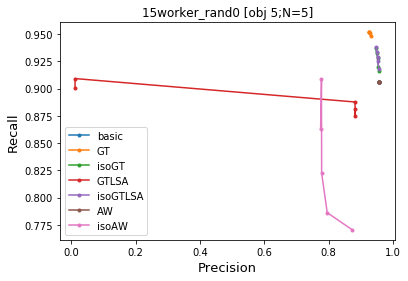

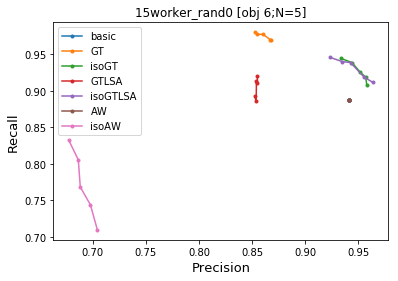

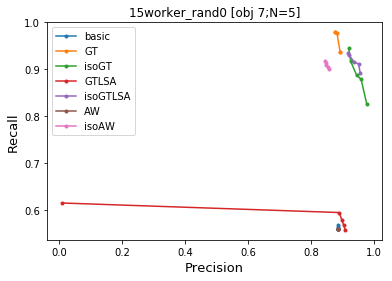

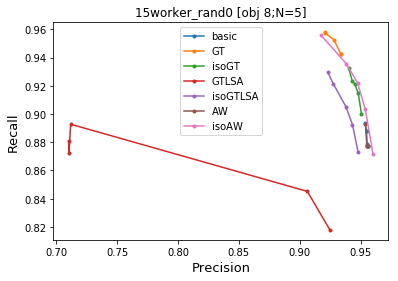

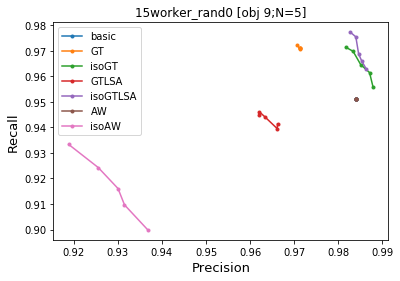

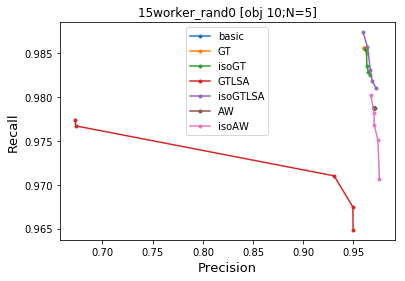

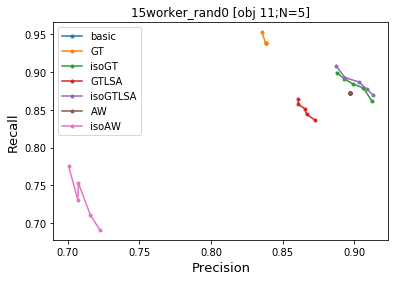

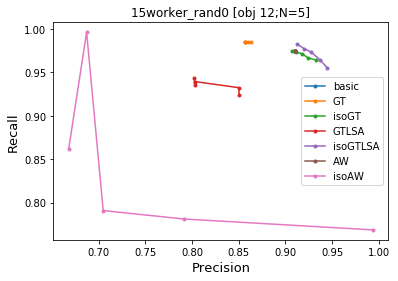

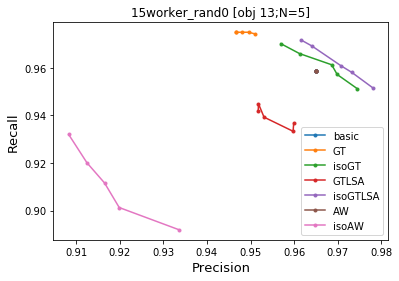

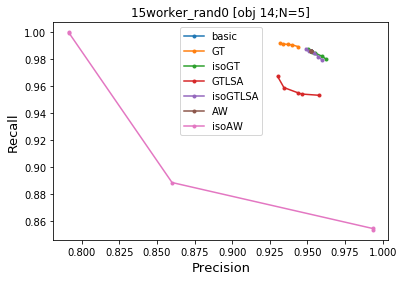

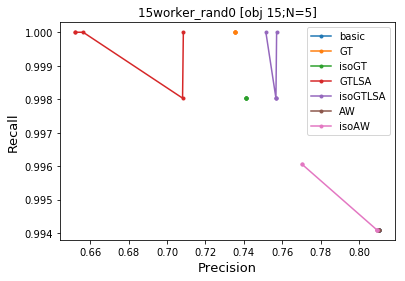

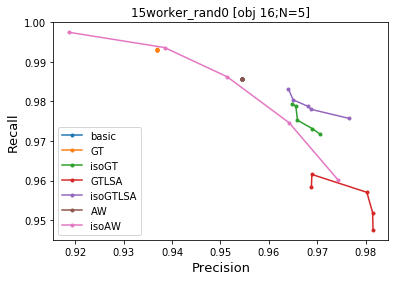

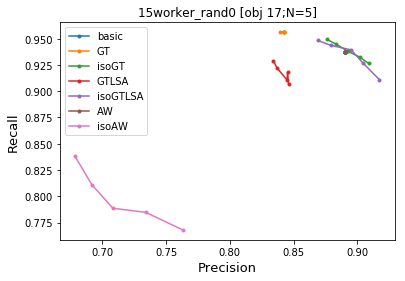

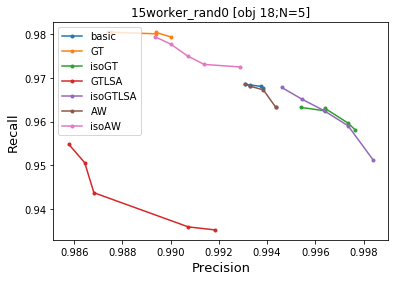

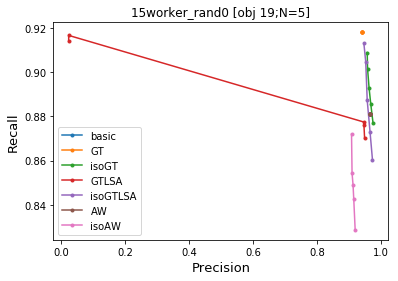

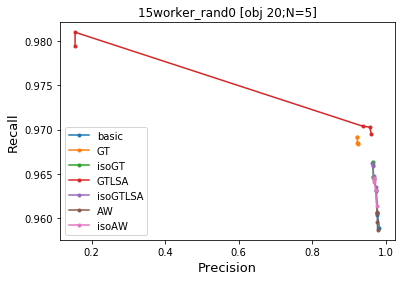

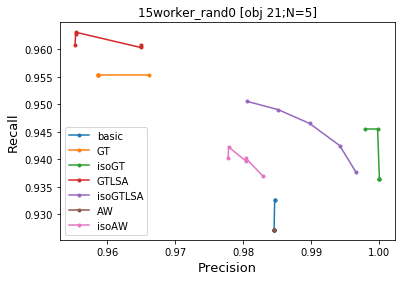

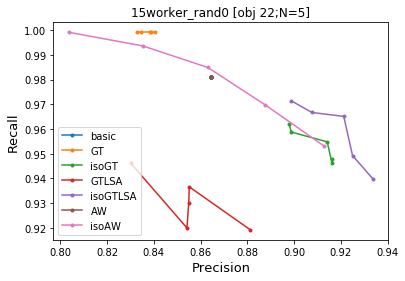

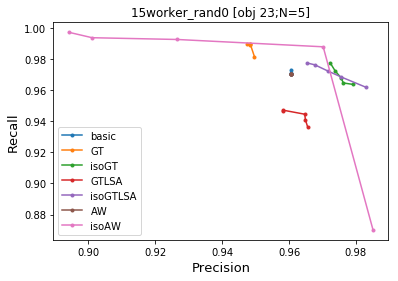

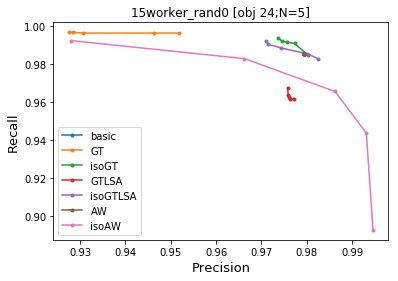

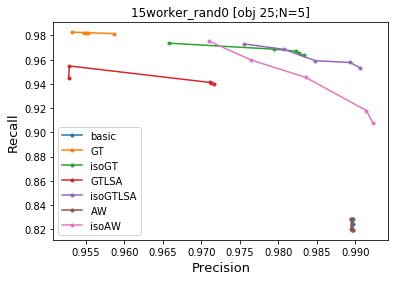

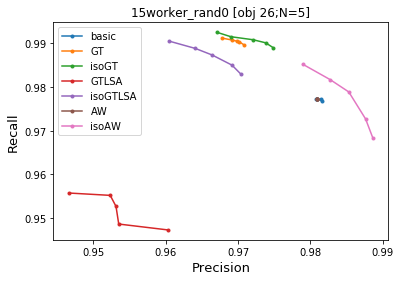

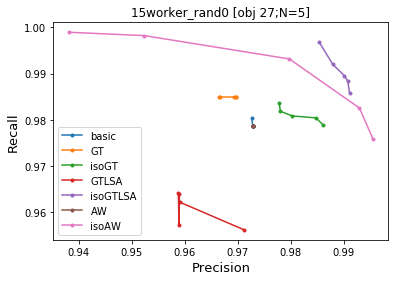

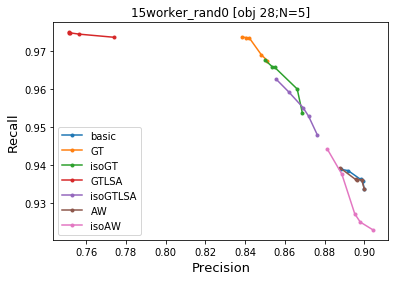

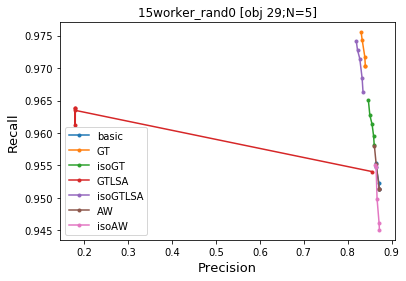

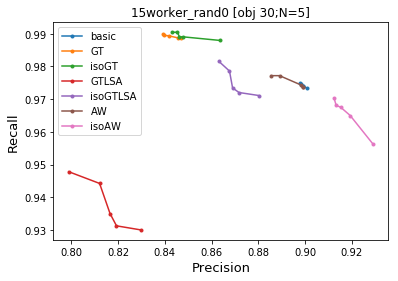

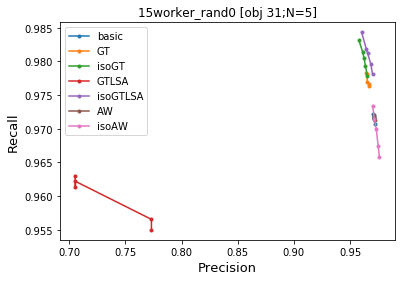

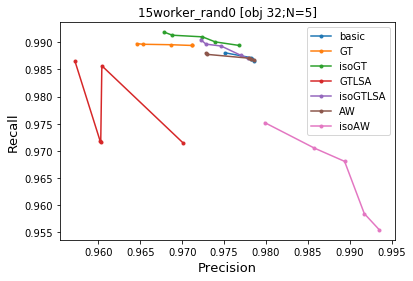

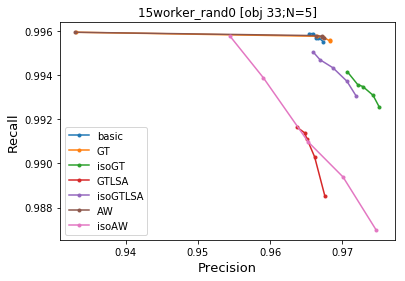

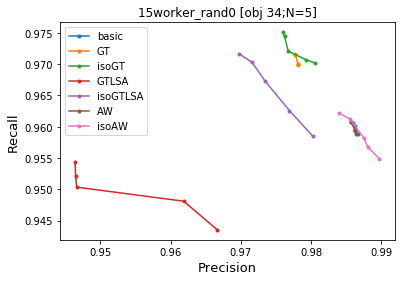

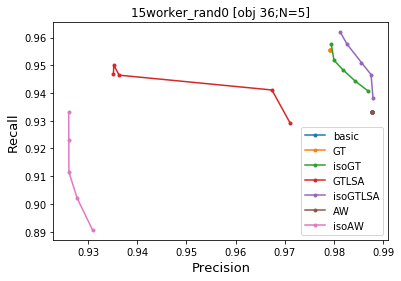

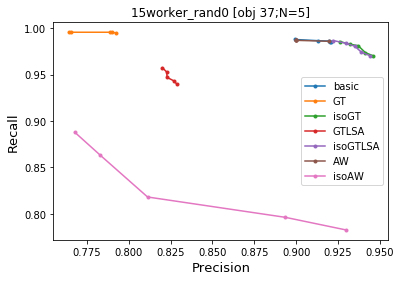

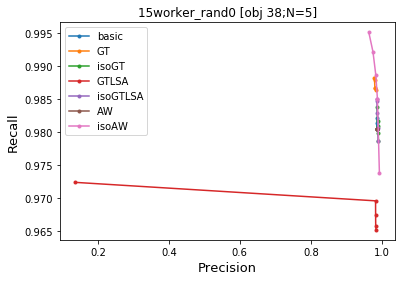

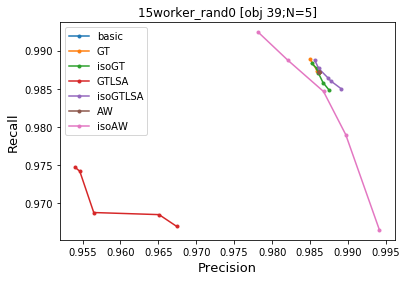

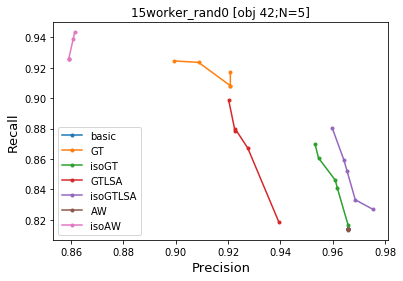

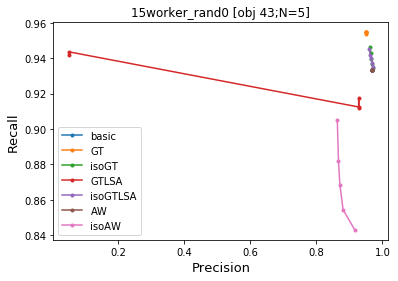

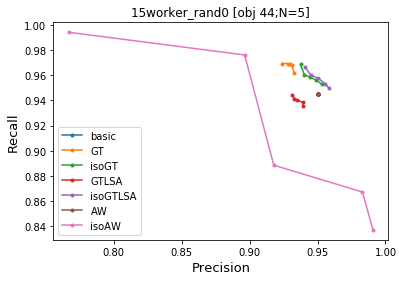

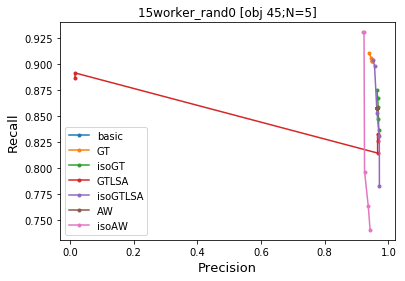

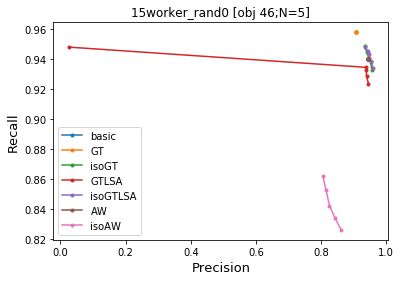

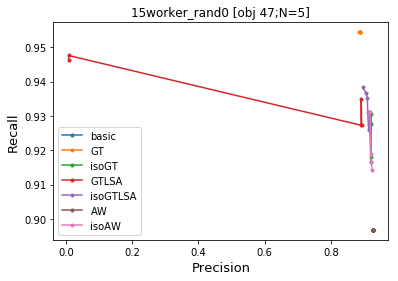

In [148]:
for i in object_lst:
    plot_PRcurve(df,i,15,0)

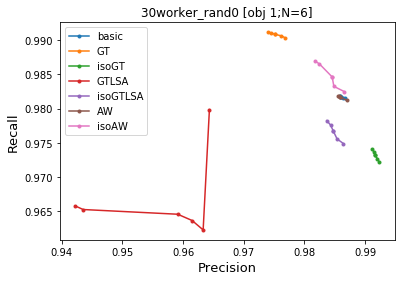

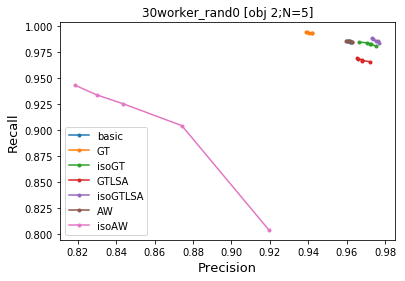

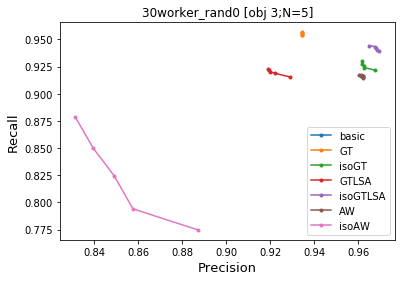

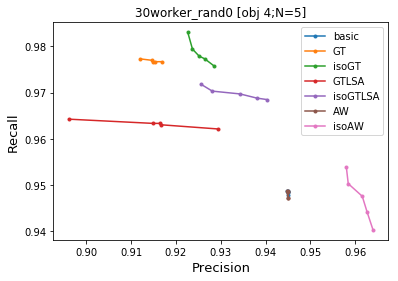

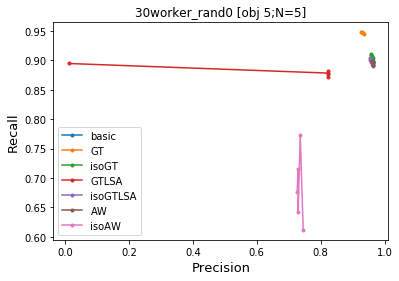

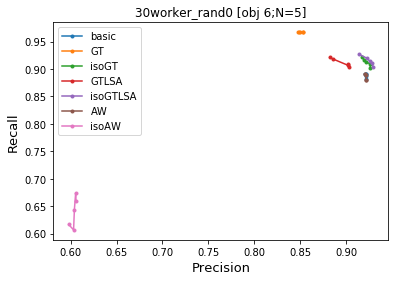

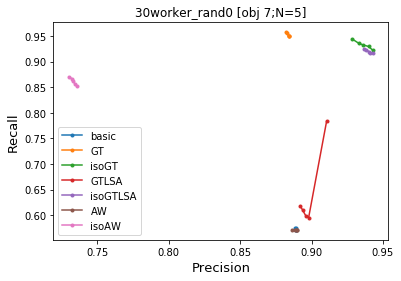

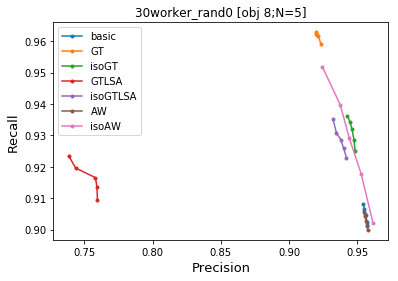

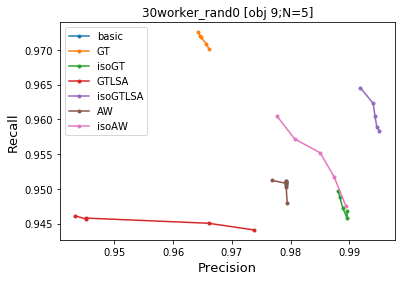

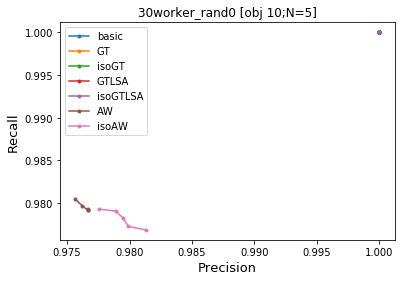

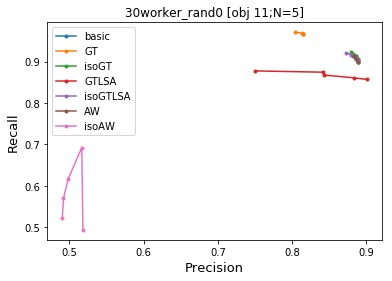

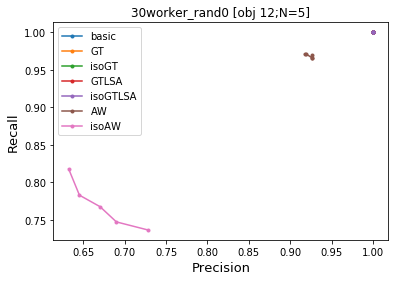

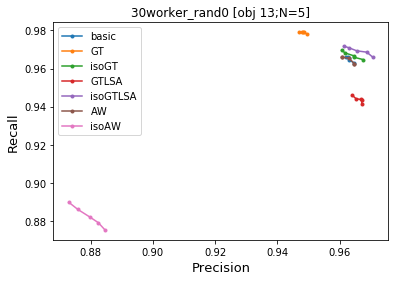

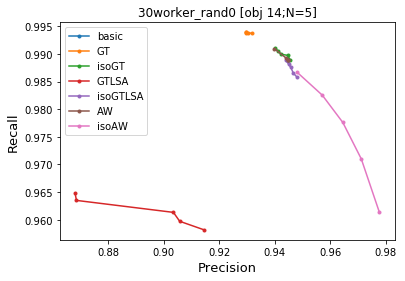

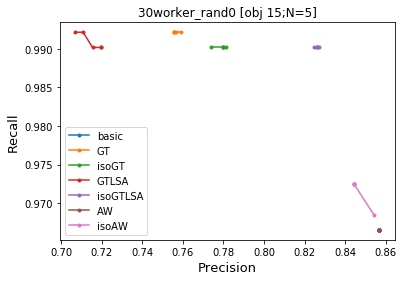

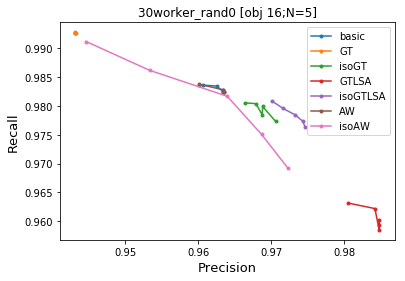

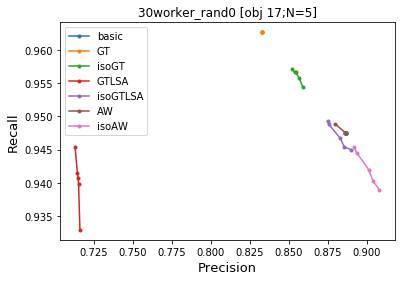

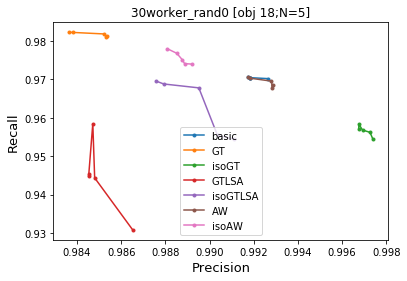

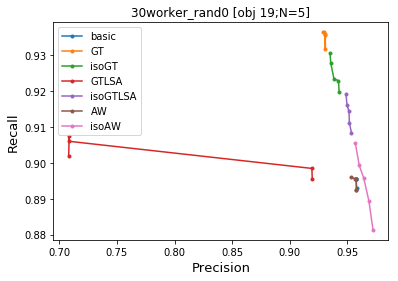

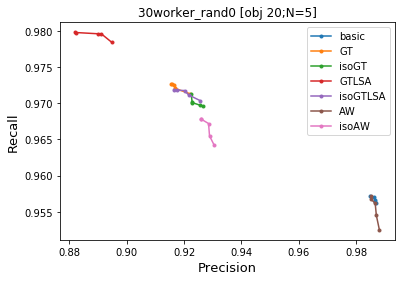

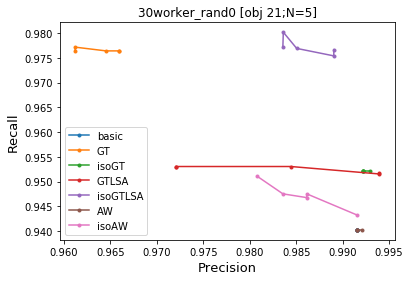

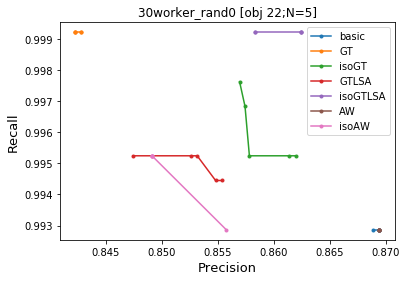

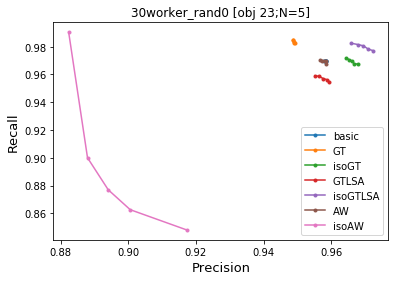

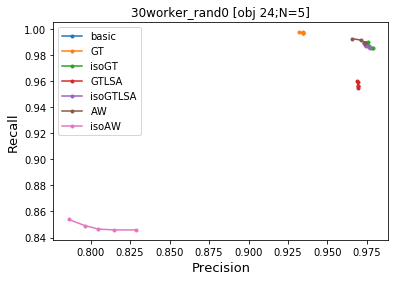

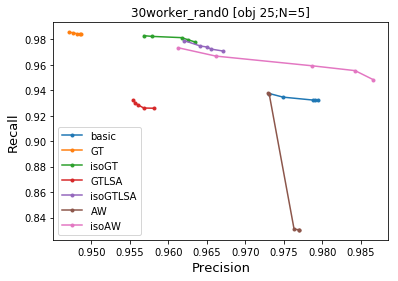

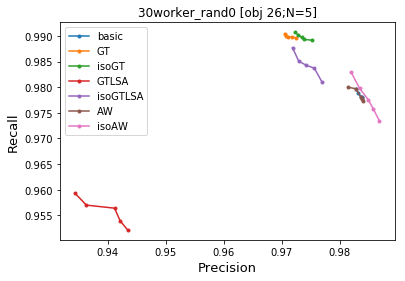

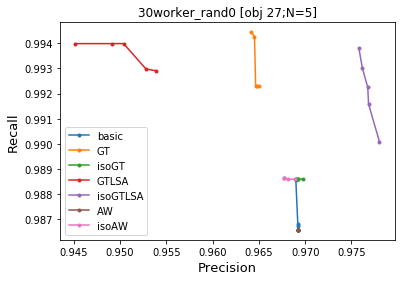

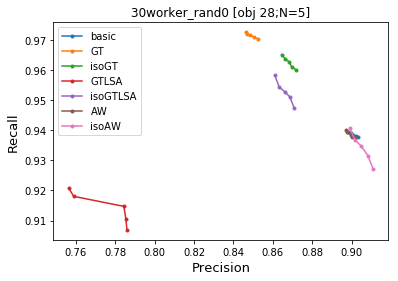

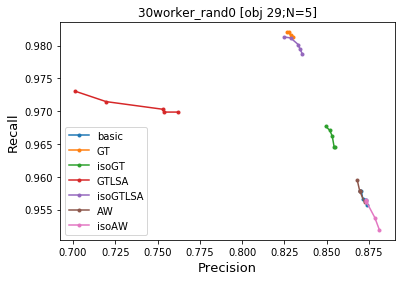

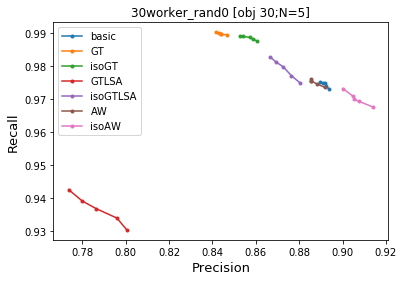

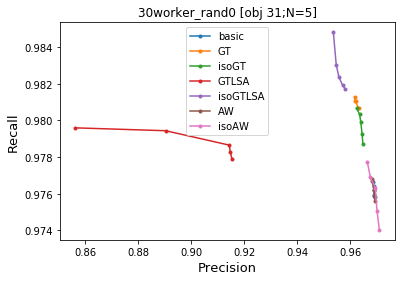

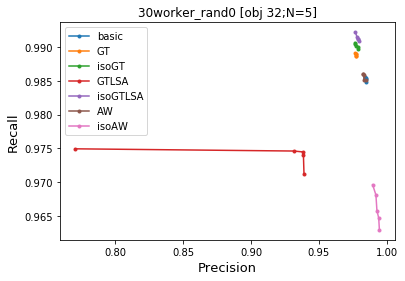

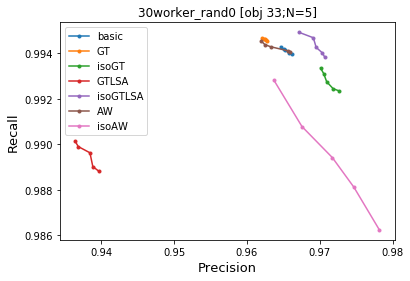

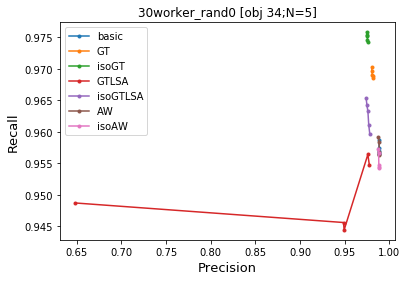

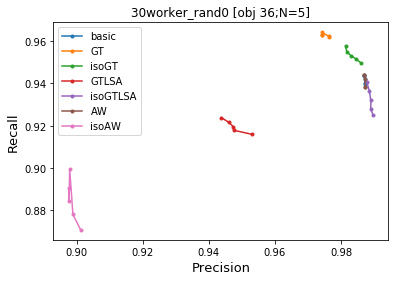

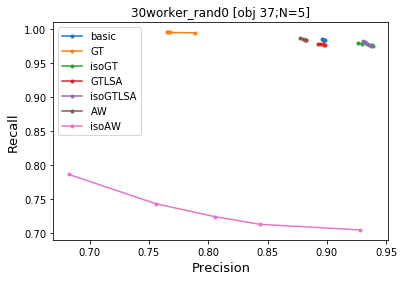

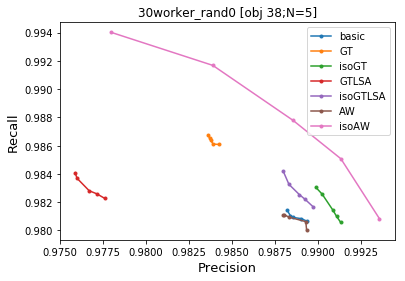

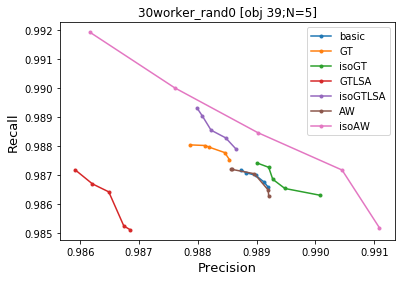

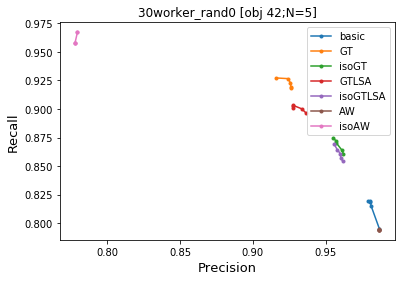

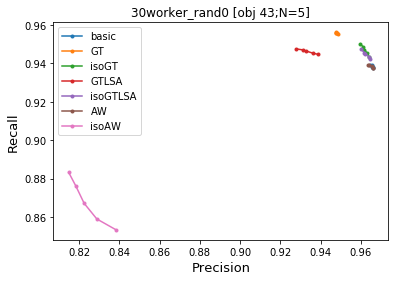

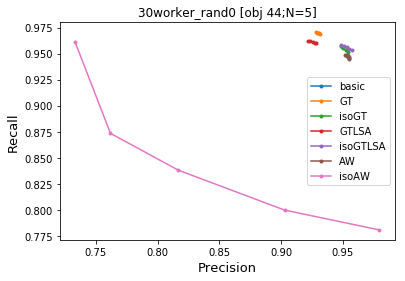

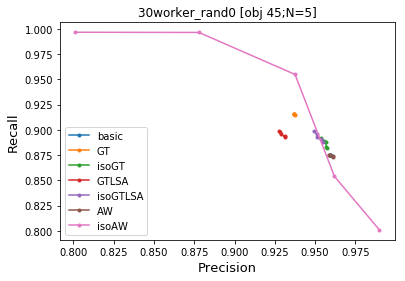

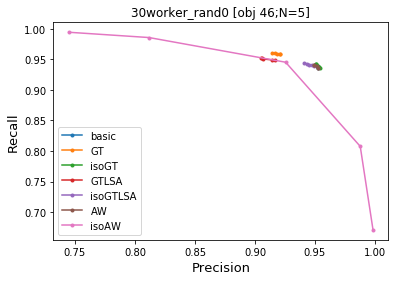

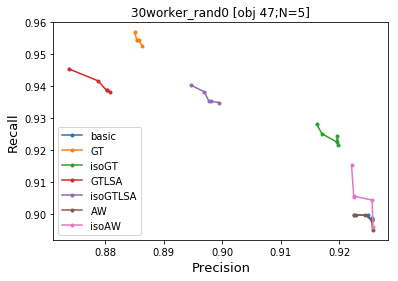

In [147]:
for i in object_lst:
    plot_PRcurve(df,i,30,0)

------------------------------------------------------------------------